# 2 Machine Learning Models

## 2.X K Nearest Neighbours Regressor

This notebook runs the k Nearest Neighbours (kNN) regression model from the SciKit Learn python library (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor).

The problem posed is to predict electricity consumption at a local (LSOA) level, the data is therefore continuous and numerical and is labelled. This lends to supervised machine learning (ML) and regression models.

It is hypothesised that there will be a correlation between mean house price sales (as an indicator of general prosperity and condition of a property) and electricity consumption. This data has previously been cleaned, is read in and split into training and test data. Results are printed in line and exported to csv for comparison against other regression models.

The feature variables include: 'Year', 'Mean price paid', and OS coordinate location data for the population weighted centroid of the LSOAs.

Initially the models were tested with 'Year' and 'Mean price paid', followed by a second model run with all the above feature variables included.

kNN hyperparameters include the number of neighbors and a weight function on the distance of neighbours. The default is uniform, meaning that each neighbor has equal influence/weighting. 

Both 'uniform' and 'distance' (where closer neighbors have greater influence)

## 2.3.1 Import Model Libraries¶

Data handling and scientific libraries used include:

numpy - (scientific numerical package for Python that enables working with arrays) pandas - (data analysis library) matplotlib - (enables plotting and visualisation in Python) openpyxl / load_workbook (opens Excel xlsx files)

In [1]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from openpyxl import load_workbook

Imports the kNN Regressor model from the SciKit Learn library.

In [3]:
#Import ML models

In [4]:
from sklearn.neighbors import KNeighborsRegressor

#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import HuberRegressor
#from sklearn.linear_model import Lars
#from sklearn.linear_model import LassoLars
#from sklearn.linear_model import PassiveAggressiveRegressor
#from sklearn.linear_model import RANSACRegressor
#from sklearn.linear_model import SGDRegressor

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.neural_network import MLPRegressor
#from sklearn.tree import DecisionTreeRegressor


Imports the standard error metric functions of Variance (explained variance), MAE, MSE and R2 from the SciKit Learn library.

Explained variance is an indicator of whether the model is accounting for the variance in the dataset.

MAE - is the real error averaged across the predicted values.

MSE - is the square of the mean error, which indicates risk and the quality of the prediction. Values closer to zero are better.

R squared or R2 'represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.'1 An R2 value closer to 1 indicates a good fit.

1 - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [5]:
#Import Error Metrics

In [6]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
#Import Test/Train split function

In [8]:
from sklearn.model_selection import train_test_split

## 2.3.2 Import Data & Split into Train/Test Data

The train_test_split function allows you to defined test_size and train_size, if one isn't specified it is set as the complementary value.

A training size of 0.75-0.8 is generally recommended. Sensitivity testing to the training size showed continuous improvement with a larger training size. Beyond 80% of the data for training may lead to overfitting hence selection at this point.

Defining the random_state with an integer allows repetition across different Notebooks/model runs.

In [9]:
#Read in datafile

In [10]:
df_LSOA_Location_Energy_Sales = pd.read_csv('1_DataCleaning/LSOA_Location_Energy_Sales.csv')

In [11]:
#Split df_LSOA_Location_Energy_Sales dataset 80:20

In [12]:
train, test = train_test_split(df_LSOA_Location_Energy_Sales, test_size=0.2, train_size=0.8, random_state=10)

## 2.3.3 Model Set-up, Training, Prediction & Evaluation

The model function undertakes the following steps:

1. The model is defined, taking the feature variables and number of neighbors as arguments.

2. The model is trained using .fit on the specified training data.

3. The model is run using .predict on the feature variables.

4. Evaluation metrics are printed to screen, stored in a dataframe and plotted (against number of neighbors).

The function returns the dataframe of evaluation metrics.

In [13]:
neighbors = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [14]:
def kNN(feature_variables, neighbors, weights):
         
    #Define empty dataframe
    df_Results = None
    
    #Fit & Run model
    for n in neighbors:
        #Define the model
        regr = KNeighborsRegressor(n_neighbors=n, weights=weights)
    
        #Set the training data
        x_train = np.asanyarray(train[feature_variables])
        y_train = np.asanyarray(train[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Train the model on the set training data
        regr.fit(x_train, y_train.ravel())
        
        #Predict results using the trained model and the previously defined test data
        y_hat = regr.predict(test[feature_variables])
    
        x_test = np.asanyarray(test[feature_variables])
        y_test = np.asanyarray(test[['Mean_domestic_electricity_consumption_kWh_per_meter']])
        
        #Check the shape of the data
        y_test = np.squeeze(y_test)
        y_test.shape
        
        #Run evaluation metrics to check the model performance & print results to notebook
        print("kNN: n_neighbours=%.2f" % n, feature_variables)
        print("Explained Variance Score: %.2f" % explained_variance_score(y_test, y_hat))
        print("MAE: %.2f" % mean_absolute_error(y_test, y_hat))
        print("MSE: %.2f" % mean_squared_error(y_test, y_hat))
        print("R2-score: %.2f" % r2_score(y_test, y_hat))
        print(" ")
        
        #Set up temporary results df
        df = None
        df = pd.DataFrame({'Explained Variance Score': [explained_variance_score(y_test, y_hat)]},
                  index=["kNN: n_neighbours=%.2f" % n])
        df.insert(1,'MAE', mean_absolute_error(y_test, y_hat))
        df.insert(2,'MSE', mean_squared_error(y_test, y_hat))
        df.insert(3,'R2_score', r2_score(y_test, y_hat))
        df.insert(0, 'Model', 'kNN')
        df.insert(1, 'N_Neighbors', n)
        df.insert(2, 'Feature Variables', [feature_variables])                          
        
        #Add each df to master df
        if df_Results is None:
            df_Results = df
        else:
            df_Results = pd.concat([df_Results, df], axis=0)                   
    
    #Plot learning curve of R2_score
    plt.scatter(df_Results.N_Neighbors, df_Results.R2_score)
    plt.xlabel("N_Neighbors")
    plt.ylabel("R2_score")
    plt.title("kNN Learning Curve - R2")
    plt.show()

    #Plot learning curve of MAE
    plt.scatter(df_Results.N_Neighbors, df_Results.MAE)
    plt.xlabel("N_Neighbors")
    plt.ylabel("MAE")
    plt.title("kNN Learning Curve - MAE")
    plt.show()
    
    return df_Results       
    

## 2.3.3.1 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year)

In the first instance 'Year' and 'Mean Price Paid' are selected as feature variables to predict 'Mean_domestic_electricity_consumption_kWh_per_meter'.

This model is expected to predict with a better fit relatively than the linear models where either 'Year' or 'Mean Price Paid' were taken as the sole feature variable as plotting of the data shows a (weak) positive correlation. From the previous simple linear model runs it is expected that 'Mean Price Paid' is the more dominant feature variable, but there is expected to be some degree of annual correlation that together could provide a better fit model.

The kNN algorithm may be better at handling the variance in the data set but is still not expected to have an objectively good fit when only the above two feature variables are selected.

As many factors affect electricity consumption it is expected that either a greater number of feature variables (or a model better able to deal with variance/complexity in the data) will provide a better fit.

kNN hyperparameters include the number of neighbors and a weight function on the distance of neighbours. The default is uniform, meaning that each neighbor has equal influence/weighting. 

Both 'uniform' and 'distance' (where closer neighbors have greater influence) are run and results are printed below.

kNN: n_neighbours=3.00 ['Mean_price_paid', 'Year']
Explained Variance Score: -0.00
MAE: 614.89
MSE: 768100.15
R2-score: -0.00
 
kNN: n_neighbours=4.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.06
MAE: 595.93
MSE: 721257.11
R2-score: 0.06
 
kNN: n_neighbours=5.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.09
MAE: 585.16
MSE: 696149.99
R2-score: 0.09
 
kNN: n_neighbours=6.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.11
MAE: 579.30
MSE: 681764.28
R2-score: 0.11
 
kNN: n_neighbours=7.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.12
MAE: 574.22
MSE: 670388.11
R2-score: 0.12
 
kNN: n_neighbours=8.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.14
MAE: 570.78
MSE: 662138.98
R2-score: 0.14
 
kNN: n_neighbours=9.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.14
MAE: 568.23
MSE: 656095.55
R2-score: 0.14
 
kNN: n_neighbours=10.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.15
MAE: 566.85
MSE: 651570.98
R2-sco

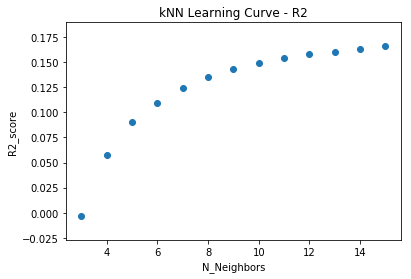

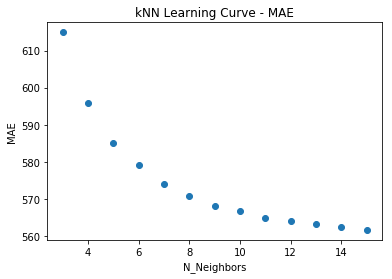

In [15]:
df_Results_1u = kNN(['Mean_price_paid','Year'], neighbors, 'uniform')

In [16]:
df_Results_1u

,Model,N_Neighbors,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
kNN: n_neighbours=3.00,kNN,3,"[Mean_price_paid, Year]",-0.003331,614.889619,768100.148789,-0.003378
kNN: n_neighbours=4.00,kNN,4,"[Mean_price_paid, Year]",0.057852,595.927033,721257.110342,0.057814
kNN: n_neighbours=5.00,kNN,5,"[Mean_price_paid, Year]",0.090643,585.157429,696149.992536,0.090611
kNN: n_neighbours=6.00,kNN,6,"[Mean_price_paid, Year]",0.109451,579.302635,681764.279968,0.109404
kNN: n_neighbours=7.00,kNN,7,"[Mean_price_paid, Year]",0.124297,574.224104,670388.107469,0.124264
kNN: n_neighbours=8.00,kNN,8,"[Mean_price_paid, Year]",0.135071,570.781875,662138.980544,0.135040
kNN: n_neighbours=9.00,kNN,9,"[Mean_price_paid, Year]",0.142957,568.232275,656095.554578,0.142935
kNN: n_neighbours=10.00,kNN,10,"[Mean_price_paid, Year]",0.148861,566.851964,651570.979022,0.148845
kNN: n_neighbours=11.00,kNN,11,"[Mean_price_paid, Year]",0.154342,565.089191,647370.786776,0.154332
kNN: n_neighbours=12.00,kNN,12,"[Mean_price_paid, Year]",0.157991,564.160996,644574.793198,0.157985


Explained Variance - is low, showing that the model doesn't deal well with the variance in the model.

MAE - the MAE is improved over the single variate model runs but still high, which would not be considered accurate enough for industry use. Although in this instance as the measure of fitness and quality of prediction are also very low these collectively indicate the model is not reliable.

MSE - is very high, reflecting a high risk of a low quality prediction.

R2 - is low demonstrating the model has poor 'fit' and doesn't deal well with the variance in the model.

CONCLUSION:

Overall the kNN model (uniform) with feature variables of 'mean price paid' and 'year' only performs as well as the single linear model predicting just on 'mean price paid' and doesn't perform as well as the multivariate linear model.

In [17]:
#Export results to csv

In [18]:
df_Results_1u.to_csv('2_ModelResults/kNN_Results_1u.csv')

kNN: n_neighbours=3.00 ['Mean_price_paid', 'Year']
Explained Variance Score: -0.06
MAE: 626.58
MSE: 809862.17
R2-score: -0.06
 
kNN: n_neighbours=4.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.00
MAE: 608.81
MSE: 764970.42
R2-score: 0.00
 
kNN: n_neighbours=5.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.04
MAE: 597.65
MSE: 738664.18
R2-score: 0.04
 
kNN: n_neighbours=6.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.06
MAE: 590.84
MSE: 722186.37
R2-score: 0.06
 
kNN: n_neighbours=7.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.07
MAE: 585.51
MSE: 710054.61
R2-score: 0.07
 
kNN: n_neighbours=8.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.08
MAE: 581.60
MSE: 700545.12
R2-score: 0.08
 
kNN: n_neighbours=9.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.09
MAE: 578.52
MSE: 693502.29
R2-score: 0.09
 
kNN: n_neighbours=10.00 ['Mean_price_paid', 'Year']
Explained Variance Score: 0.10
MAE: 576.47
MSE: 687977.36
R2-sco

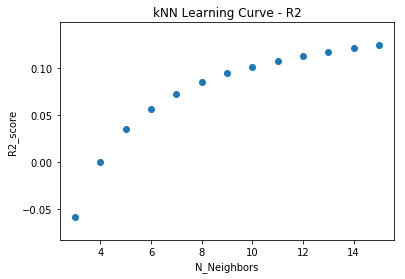

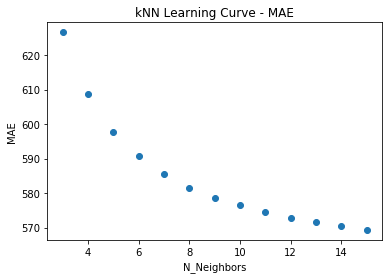

In [19]:
df_Results_1d = kNN(['Mean_price_paid','Year'], neighbors, 'distance')

In [20]:
df_Results_1d

,Model,N_Neighbors,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
kNN: n_neighbours=3.00,kNN,3,"[Mean_price_paid, Year]",-0.057896,626.582823,809862.166379,-0.057932
kNN: n_neighbours=4.00,kNN,4,"[Mean_price_paid, Year]",0.000731,608.809576,764970.422187,0.000710
kNN: n_neighbours=5.00,kNN,5,"[Mean_price_paid, Year]",0.035090,597.648746,738664.181903,0.035075
kNN: n_neighbours=6.00,kNN,6,"[Mean_price_paid, Year]",0.056621,590.836727,722186.368629,0.056600
kNN: n_neighbours=7.00,kNN,7,"[Mean_price_paid, Year]",0.072463,585.506613,710054.606204,0.072448
kNN: n_neighbours=8.00,kNN,8,"[Mean_price_paid, Year]",0.084886,581.598906,700545.116476,0.084870
kNN: n_neighbours=9.00,kNN,9,"[Mean_price_paid, Year]",0.094084,578.516488,693502.285009,0.094070
kNN: n_neighbours=10.00,kNN,10,"[Mean_price_paid, Year]",0.101298,576.467936,687977.362819,0.101287
kNN: n_neighbours=11.00,kNN,11,"[Mean_price_paid, Year]",0.107752,574.407719,683034.936365,0.107744
kNN: n_neighbours=12.00,kNN,12,"[Mean_price_paid, Year]",0.112580,572.855031,679337.696582,0.112573


Explained Variance - is low, showing that the model doesn't deal well with the variance in the model.

MAE - the MAE is improved over the single variate model runs but still high, which would not be considered accurate enough for industry use. Although in this instance as the measure of fitness and quality of prediction are also very low these collectively indicate the model is not reliable.

MSE - is very high, reflecting a high risk of a low quality prediction.

R2 - is low demonstrating the model has poor 'fit' and doesn't deal well with the variance in the model.

CONCLUSION:

Overall the kNN model (distance) with feature variables of 'mean price paid' and 'year' performs worse than when a uniform weighting is applied to the neighbors.

In [21]:
#Export results to csv

In [22]:
df_Results_1d.to_csv('2_ModelResults/kNN_Results_1d.csv')

## 2.3.3.2 - Model Training & Evaluation (Feature Variables = Mean Price Paid, Year, X, Y)

Location as a feature variable is expected to improve the model and support better management of the variance in the data set. 

Location is denoted by two feature variables 'X' and 'Y' which represent the X, Y OS Coordinates of the population weighted centroid for each LSOA. Both are therefore implemented within the same model run.

It is hypothesized that selecting 'distance' for the weights hyperparameter will result in a better fit (with X, Y feature variables included) on the basis that location is expected to be the most dominant feature variable and selecting 'distance' enhances this influence.

kNN: n_neighbours=3.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.54
MAE: 416.45
MSE: 352724.11
R2-score: 0.54
 
kNN: n_neighbours=4.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.55
MAE: 413.08
MSE: 344823.63
R2-score: 0.55
 
kNN: n_neighbours=5.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.55
MAE: 411.96
MSE: 341820.97
R2-score: 0.55
 
kNN: n_neighbours=6.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.56
MAE: 411.55
MSE: 341023.07
R2-score: 0.55
 
kNN: n_neighbours=7.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.55
MAE: 412.43
MSE: 342363.20
R2-score: 0.55
 
kNN: n_neighbours=8.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.55
MAE: 413.43
MSE: 343302.74
R2-score: 0.55
 
kNN: n_neighbours=9.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.55
MAE: 414.25
MSE: 344253.48
R2-score: 0.55
 
kNN: n_neighbours=10.00 ['Mean_price_paid', 'Yea

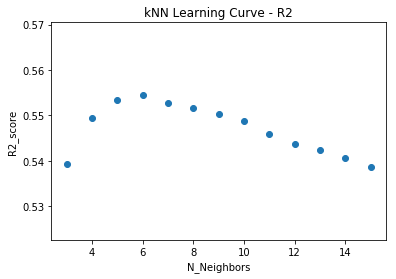

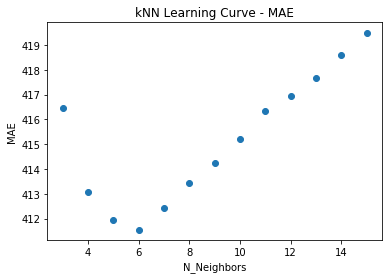

In [23]:
df_Results_2u = kNN(['Mean_price_paid','Year', 'X', 'Y'], neighbors, 'uniform')

In [24]:
df_Results_2u

,Model,N_Neighbors,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
kNN: n_neighbours=3.00,kNN,3,"[Mean_price_paid, Year, X, Y]",0.540527,416.454765,352724.109590,0.539233
kNN: n_neighbours=4.00,kNN,4,"[Mean_price_paid, Year, X, Y]",0.550897,413.082799,344823.627020,0.549553
kNN: n_neighbours=5.00,kNN,5,"[Mean_price_paid, Year, X, Y]",0.554894,411.959145,341820.966941,0.553475
kNN: n_neighbours=6.00,kNN,6,"[Mean_price_paid, Year, X, Y]",0.555983,411.554495,341023.074736,0.554518
kNN: n_neighbours=7.00,kNN,7,"[Mean_price_paid, Year, X, Y]",0.554249,412.427280,342363.195690,0.552767
kNN: n_neighbours=8.00,kNN,8,"[Mean_price_paid, Year, X, Y]",0.552997,413.428652,343302.744759,0.551540
kNN: n_neighbours=9.00,kNN,9,"[Mean_price_paid, Year, X, Y]",0.551736,414.245886,344253.479694,0.550298
kNN: n_neighbours=10.00,kNN,10,"[Mean_price_paid, Year, X, Y]",0.550164,415.194195,345456.673623,0.548726
kNN: n_neighbours=11.00,kNN,11,"[Mean_price_paid, Year, X, Y]",0.547368,416.322426,347621.925292,0.545898
kNN: n_neighbours=12.00,kNN,12,"[Mean_price_paid, Year, X, Y]",0.545261,416.961485,349230.779307,0.543796


Explained Variance - is improved at 0.55, showing that the model deals better with the variance in the model.

MAE - the MAE is improved over linear models and those run without location feature variables, at ~10% of the mean electricity consumption.

MSE - is still high, reflecting a high risk of a low quality prediction.

R2 - is improved at 0.55, demonstrating the model 'fit' is improving.

CONCLUSION:

Overall the kNN model (uniform) with feature variables of 'mean price paid', 'year', 'X' and 'Y' performs much better than linear models and those without the location feature variables.

However, an R2 score of 0.55 and a MAE of ~10% compared to the mean for the data set is still not a good enough fit to use the model in earnest. Further improvements through model refinements, additional possible feature variables or alternative models would be required.

In [32]:
#Export results to csv

In [26]:
df_Results_2u.to_csv('2_ModelResults/kNN_Results_2u.csv')

kNN: n_neighbours=3.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.56
MAE: 402.24
MSE: 337920.38
R2-score: 0.56
 
kNN: n_neighbours=4.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 396.12
MSE: 325449.47
R2-score: 0.57
 
kNN: n_neighbours=5.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.58
MAE: 393.19
MSE: 318930.13
R2-score: 0.58
 
kNN: n_neighbours=6.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.59
MAE: 391.38
MSE: 315602.16
R2-score: 0.59
 
kNN: n_neighbours=7.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.59
MAE: 390.82
MSE: 314392.08
R2-score: 0.59
 
kNN: n_neighbours=8.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.59
MAE: 390.69
MSE: 313464.06
R2-score: 0.59
 
kNN: n_neighbours=9.00 ['Mean_price_paid', 'Year', 'X', 'Y']
Explained Variance Score: 0.59
MAE: 390.83
MSE: 313152.54
R2-score: 0.59
 
kNN: n_neighbours=10.00 ['Mean_price_paid', 'Yea

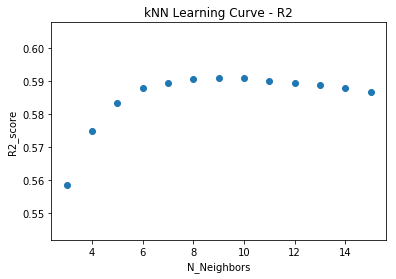

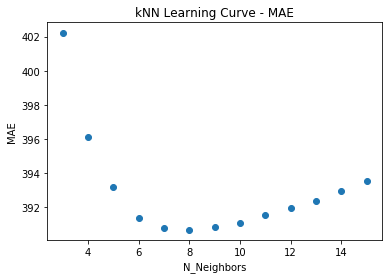

In [27]:
df_Results_2d = kNN(['Mean_price_paid','Year', 'X', 'Y'], neighbors, 'distance')

In [28]:
df_Results_2d

,Model,N_Neighbors,Feature Variables,Explained Variance Score,MAE,MSE,R2_score
kNN: n_neighbours=3.00,kNN,3,"[Mean_price_paid, Year, X, Y]",0.559745,402.239978,337920.378441,0.558571
kNN: n_neighbours=4.00,kNN,4,"[Mean_price_paid, Year, X, Y]",0.576084,396.117711,325449.465837,0.574862
kNN: n_neighbours=5.00,kNN,5,"[Mean_price_paid, Year, X, Y]",0.584688,393.185141,318930.131339,0.583378
kNN: n_neighbours=6.00,kNN,6,"[Mean_price_paid, Year, X, Y]",0.589104,391.382993,315602.160250,0.587725
kNN: n_neighbours=7.00,kNN,7,"[Mean_price_paid, Year, X, Y]",0.590727,390.817179,314392.075709,0.589306
kNN: n_neighbours=8.00,kNN,8,"[Mean_price_paid, Year, X, Y]",0.591947,390.694278,313464.061176,0.590518
kNN: n_neighbours=9.00,kNN,9,"[Mean_price_paid, Year, X, Y]",0.592372,390.831373,313152.543014,0.590925
kNN: n_neighbours=10.00,kNN,10,"[Mean_price_paid, Year, X, Y]",0.592389,391.116293,313163.623707,0.590911
kNN: n_neighbours=11.00,kNN,11,"[Mean_price_paid, Year, X, Y]",0.591575,391.584367,313818.522769,0.590055
kNN: n_neighbours=12.00,kNN,12,"[Mean_price_paid, Year, X, Y]",0.590778,391.978112,314441.674502,0.589241


Explained Variance - is improved at 0.59, showing that the model deals better with the variance in the model.

MAE - the MAE is improved over the previous kNN model runs, linear models and those run without location feature variables, at ~10% of the mean electricity consumption.

MSE - is still high, reflecting a high risk of a low quality prediction.

R2 - is improved at 0.59, demonstrating the model 'fit' is improving.

CONCLUSION:

Overall the kNN model (distance) with feature variables of 'mean price paid', 'year', 'X' and 'Y' performs best overall from the kNN (and linear) models run. A neighbor value of 8 appears to provide the optimum achievable fit with these feature variables.

However, an R2 score of 0.59 and a MAE of still ~10% compared to the mean for the data set is still not a good enough fit to use the model in earnest. Further improvements through additional possible feature variables or alternative models would be required.

In [29]:
#Export results to csv

In [30]:
df_Results_2d.to_csv('2_ModelResults/kNN_Results_2d.csv')

In [31]:
#END